# Central Limit Theorem (CLT) - Revisited with Scipy

In [5]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Scientific library
import scipy.stats as stats

 
You can use <a href="https://seaborn.pydata.org/generated/seaborn.load_dataset.html"><code>seaborn.load_dataset</code></a>

In [2]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 🧐 Exploratory Data Analysis (EDA)

In [9]:
# How many rows are available in the dataset ❓
len(df)

244

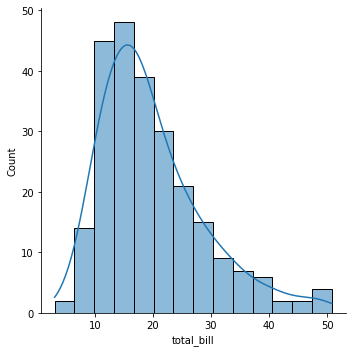

In [12]:
sns.displot(x = 'total_bill', data = df, kde = True)

In [17]:
# The variables `mu`, `sigma`, 'skew', 'kurtosis'

mu = df["total_bill"].mean()
sigma = df["total_bill"].std()
skew = df["total_bill"].skew()
kurtosis = df["total_bill"].kurtosis()

print(f"mu: {round(mu,2)}")
print(f"sigma: {round(sigma,2)}")
print(f"skew: {round(skew,2)}")
print(f"kurtosis: {round(kurtosis,2)}")

mu: 19.79
sigma: 8.9
skew: 1.13
kurtosis: 1.22


In [18]:
N = 5000

list_of_n = [1, 5, 50, 100, 500, 1000, 5000, 10_000]

delta_mu = []
delta_sigma = []
skewnes_history = []
kurtosis_history = []

for n in list_of_n:
    # sampling
    sampled_means = [df["total_bill"].sample(n, replace=True).mean() for i in range(N)]
    # difference in theoretical expectation vs sampled expectation
    mu_diff = mu - np.mean(sampled_means)
    delta_mu.append(mu_diff)
    # difference in theoretical standard deviation vs. standard deviation
    sigma_diff = sigma / np.sqrt(n) - np.std(sampled_means)
    delta_sigma.append(sigma_diff)
    # skewness and kurtosis
    skewnes_history.append(stats.skew(sampled_means))    
    kurtosis_history.append(stats.kurtosis(sampled_means))
    
results_from_simulation = pd.DataFrame(data ={"n":list_of_n,
                                              "𝚫mu":delta_mu,
                                             "𝚫sigma":delta_sigma,
                                             "skew":skewnes_history,
                                             "kurtosis":kurtosis_history,})
print(round(results_from_simulation,3).to_string(index = False))

    n    𝚫mu  𝚫sigma   skew  kurtosis
    1 -0.065   0.150  1.089     1.117
    5 -0.065   0.025  0.495     0.183
   50 -0.003  -0.020  0.154    -0.017
  100 -0.003   0.004  0.063     0.046
  500 -0.010  -0.003  0.055     0.030
 1000 -0.001  -0.000 -0.023    -0.034
 5000 -0.001  -0.001 -0.012    -0.035
10000 -0.001  -0.001  0.057     0.004
